In [6]:
import numpy as np
import sympy as sp
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 240
import matplotlib.pyplot as plt
sp.init_printing()
import pandas as pd
import pyPLUTO as pp

In [14]:
L0 = 14959789200000.0 # 1 code unit of length in centimeter
v0 = 1e5 # 1 code unit of velocity in cm/s
t0 = L0/v0 # 1 code unit of time in seconds

In [23]:
def radius(img):
    domainsize = len(img)
    background_prs = img[0,0]
    wave_position = np.zeros(domainsize)
    center_line = img[domainsize//2]
    wave  = center_line > background_prs*1.01
    j = 0
    while not wave[j]:
        j += 1
    return domainsize//2 - j

In [42]:
R = np.zeros(80)
t = np.zeros(80)
for i in range(80):
    frame = pp.pload(i, "../pluto-definitions/blastwave-lowpress/mu0/")
    R[i] = radius(frame.prs)*frame.dx1[0]
    t[i] = frame.SimTime

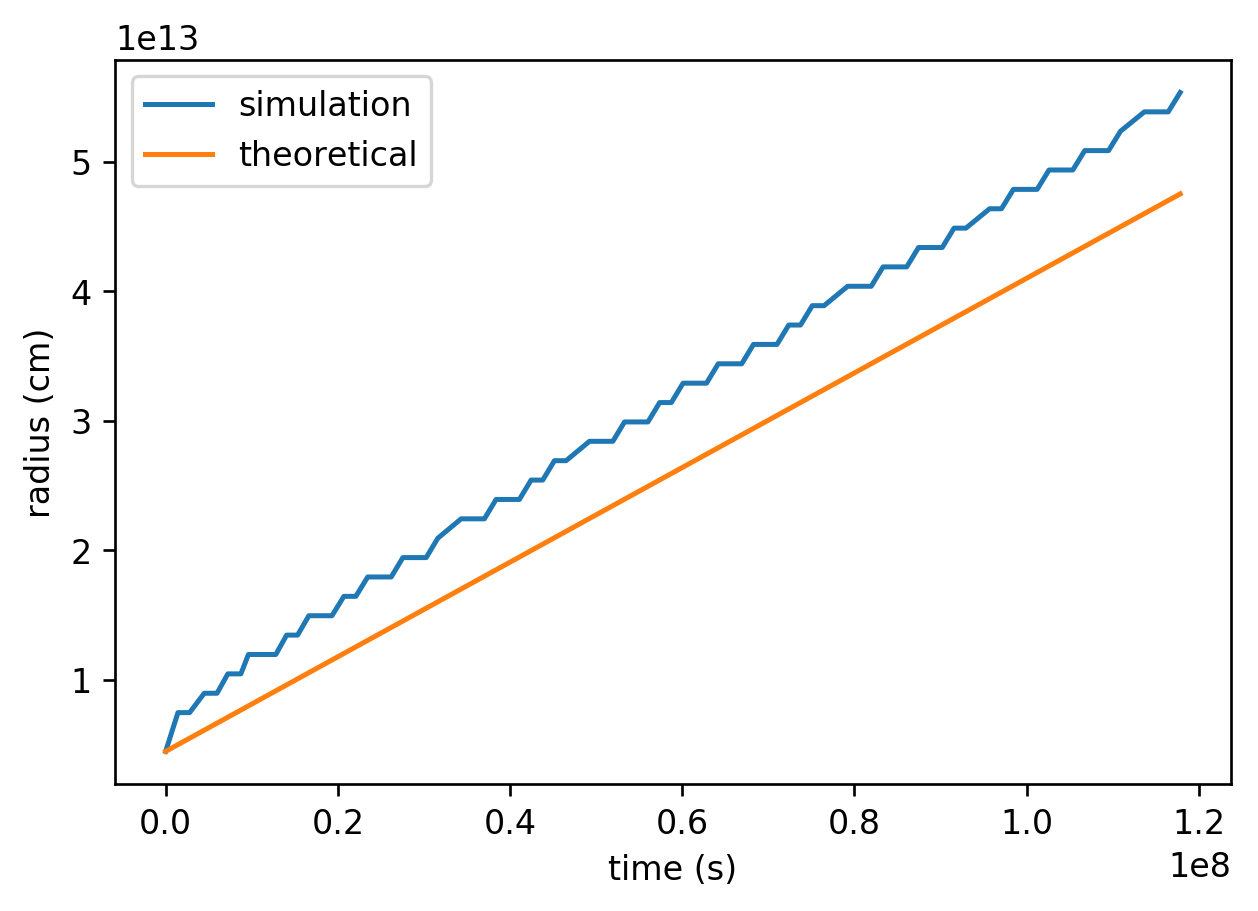

In [49]:
plt.plot(t*t0, R*L0, label = "simulation")
plt.xlabel("time (s)")
plt.ylabel("radius (cm)")
plt.plot(t*t0, (np.sqrt(5/3*8) *t + 0.3)*L0, label = "theoretical")
plt.legend()

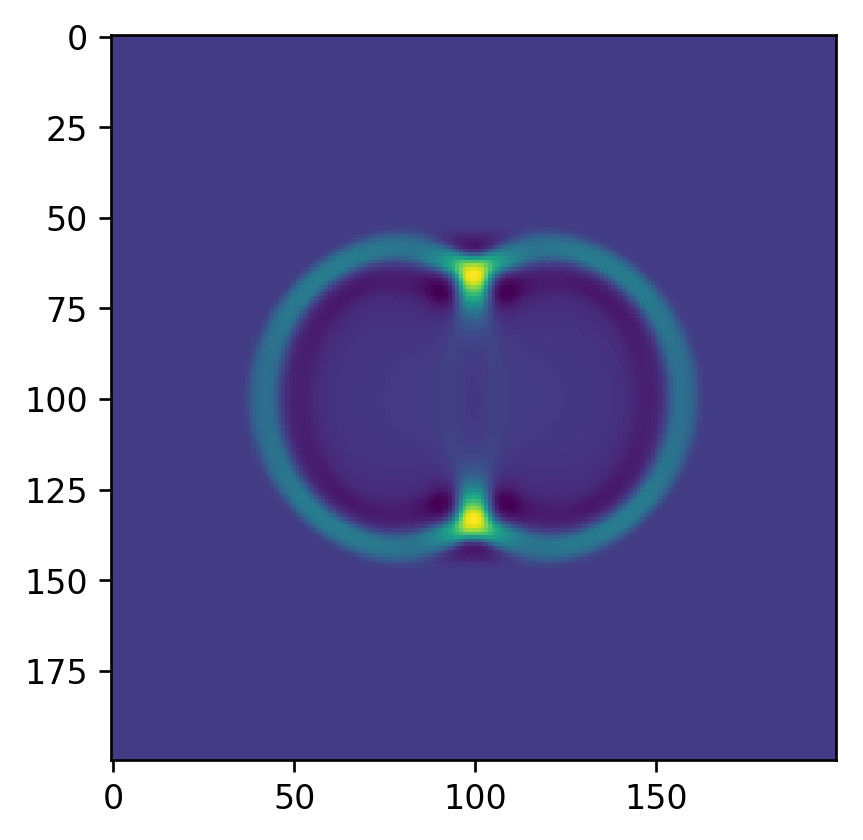

In [56]:
i = 143
frame = pp.pload(i, "../pluto-definitions/blastwave-lowpress/")
plt.imshow(frame.prs)